# Exploring How SE Academic Papers Use Figures

Marco Torchiano [](https://orcid.org/0000-0001-5328-368X) (Politecnico di Torino)  
Lorenzo Laudadio [](https://orcid.org/0009-0001-3496-0072) (Politecnico di Torino)

The usage of figures to represent data or concepts in scientific articles is a common practice. We aim to understand what figures are used for in SE articles and in particular how quantitative data is represented. For this purpose we analyzed 865 articles published in leading software engineering scientific conferences and journals and classified 6342 figures and their contents. 47% of the figures are used to convey quantitative information and the rest depict more abstract non-quantitative information. The most common types of quantitative diagrams are bar plots, box plots, and line plots, accounting for 75% of the quantitative figures. We also found that each figure contains 1.6 errors, although 75% of them do not contain any critical error. Critical blatant errors are found in less than 5% of the figures.

In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.1     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

# Introduction

In software engineering (SE) research, the effective communication of ideas, methodologies, and results is paramount. Papers in this field often employ a variety of visual aids, including figures, tables, and code fragments, to complement the textual content and enhance clarity. While there exist a large research community that explores innovative visualization techniques, the majority of visualizations in SE papers remain relatively mundane, relying on basic, well-established methods. This reliance on standard visual aids reflects both the practical constraints and the entrenched practices within the field.

Practitioners who regularly writes papers and supervises younger researchers, can often find themselves providing guidance on the effective use of visualizations. This necessity arises from observing a recurring issue: poorly designed diagrams that fail to effectively convey the intended information. Additionally, as reviewers, we frequently encounter diagrams that are not only visually unappealing but also ineffective in communicating complex ideas. These experiences underscore a broader concern within the community regarding the presentation quality of SE papers. A critical question emerges: is it worthwhile to invest substantial effort in designing more sophisticated and effective diagrams? This paper aims to address this question by examining the current state of visualization practices in SE research.

The goal of this paper is to advance the discourse on visualization in software engineering. The main contributions consist in:

-   Overview of the State of the Practice: We provide a comprehensive analysis of the current visualization practices within prominent SE venues, identifying prevailing trends and common practices.
-   Purpose of Figures: An examination of the various roles that figures play in SE papers, shedding light on how they contribute to the overall narrative and understanding of the research.
-   Catalogue of Common Diagrams: A detailed catalog of the most frequently used diagrams, offering insights into their typical applications and variations.

In particular we will focus on quantitative visualization, i.e. charts and diagrams that encode quantitative measures. This is opposed to non-quantitative visualization that represent conceptual aspects in a more or less formal way, e.g., software representations such as UML diagrams.

Overall by surveying the current practices and identifying most common errors, this paper seeks to elevate the standard of visual communication in software engineering research, ultimately contributing to the clarity and impact of published work.

# Background

Data visualization is a critical component in the communication of scientific research, enabling the distillation of complex data into comprehensible visual formats. By transforming raw data into graphical representations, researchers can more effectively highlight patterns, trends, and anomalies, thereby facilitating better understanding and interpretation. In the context of academic publications, well-designed visualizations are not merely supplementary but essential elements that enhance the clarity and impact of the presented research.

## Visualization of Quantitative Information

The seminal book *The Visual Display of Quantitative Information* \[@tufte1983\] revolutionized the way quantitative data is presented. Tufte emphasized principles such as lie factor and data-ink ratio, and laid the groundwork for a set of best practices that prioritize proportionality, clarity, and utility in the visual representation of data.

Building on the principles established by Tufte, subsequent scholars have further refined the guidelines for effective data visualization. Notably, Tamara Munzner’s *Visualization Analysis and Design* \[@munzner2014\] offers a comprehensive framework for creating insightful and effective visualizations. Munzner’s work addresses the complexity of visual encoding and interaction, providing a systematic approach to design that is applicable across various disciplines. Her guidelines cover a broad spectrum of visualization types, from simple charts to complex, interactive graphics, emphasizing the importance of aligning visualization techniques with the specific needs and goals of the analysis.

In the domain of software engineering (SE), tailored guidelines for visualization have been proposed to address the unique challenges and requirements of the field. One notable contribution is the Empirical Standards for Software Engineering Research, as articulated by \[@EmpiricalStandards\]. These standards provide a robust framework for conducting and presenting empirical research in SE, including specific recommendations for the use of visualizations. The guidelines emphasize aim to ensure that dagrams and charts effectively support the communication of research findings.

## Graph Error Taxonomy

On the basis of the extensive literature and the personal experience in reviewing papers we defined a taxonomy of errors that include three levels of severity:

-   Critical: the error can severely impact the correct understanding of the quantitative message;
-   Major: the error can significantly impact the ease of understanding, demanding more effort than strictly required;
-   Minor: the error can moderately impact the ease of understanding.

In [ ]:
errors <- read_csv("data/GraphErrors.csv", 
                    col_types = cols(
                      Severity = col_factor(levels=c("Critical","Major","Minor")),
                      Error = col_character(),
                      Description = col_character()
                    ))
errors_tab <- errors |> 
  arrange(Severity,Error) |>
  group_by(Severity) |>
  summarize(Errors = str_wrap(paste(Error,collapse = ", "), width=40)) 

The detailed descriptions of the are reported below:

``` r
errors |> 
  arrange(Severity,Error) |>
  rowwise() |>
  summarize(Severity=Severity,desc = paste0("- **",Error,"** ",Description)) |>
  group_by(Severity) |> 
  summarize(desc=paste("### ",first(Severity),"\n\n", desc |> paste0(collapse="\n\n"))) %>%
  .$desc |> paste0(collapse="\n\n") |> cat()
```

### Critical

-   **Cropped** The graph is cropped and some details are not visible since they lay outside. This impedes the vision of part of the diagram.

-   **Deformed** The graph is somehow deformed with proportion not consistente across the area. Often this is – wrongly – used to emphasize some detail instead of using more suitable techniques, the reuslt is a deception of the observer \[@pandey2015\].

-   **DoubleScale** The graph uses a double (vertical) scale. Research in cognitive science \[@Few2012\] suggests that people may misinterpret trends if they do not notice the differing scales, potentially leading to incorrect conclusions about the correlation between the two datasets.

-   **MissingAxesRef** The whole axes or the tick marks are missing. This make the quantitative information contained in the diagram fuzzy and imprecise failing the goal of conveying accurate information.

-   **NonZeroBased** A bar diagram with truncated bars, axis not starting at 0. This is a serious problem concerning the visual integrity of the diagram, in particualar it affects proportionality \[@tufte1983\], thus falsifying the quantitative message of the diagram.

-   **SimilarColors** Graph uses very similar colors, hard to tell apart. Research indicates that low contrast between colors (especially in terms of luminosity) can reduce the speed and accuracy of information interpretation \[@ware2013, @silva2011\].

-   **TooManyCats** The graph encodes too many categories (usually more than six) with attributes like color or shape. For instance, @macdonald1999 recommends that the number of colors used to represent nominal data should be restricted to seven or less, while sudies by @ware2013 found that people can typically distinguish 4 to 6 distinct shapes effectively.

### Major

-   **3D** There are 3D effects. The additional cognitive effort required for 3D interpretation often results in slower reaction times and higher error rates \[@ware2013\].

-   **GridDistinctRanges** When multiple graph are present (grid of chars, a.k.a. small multiples), the corresponding axes have different intervals. @heer2009 shows that when the scales are consistent across all plots, viewers can quickly and accurately compare values; while inconsistent axes may lead to misinterpretation.

-   **InterruptedScale** One of the axes is interrupted and restarted after a discontinuity to show extremely spread values. Axis breaks can affect the perceived effect size, leading viewers to believe that the differences between data points are more significant than they actually are \[@pandey2015\].

-   **Legend** There is a legend that could have been turned into direct labeling. Direct labeling (i.e., placing labels close to the data points) instead of using a separate legend reduces the need for eye movements between the legend and the chart elements, thus it leads to faster and more accurate interpretation \[@ratwani2008\].

-   **Mislabeled** Labels are obscuring or get confused with data. A key recommendation when creating a diagram is ‘above all show the data’ \[@tufte1983\].

-   **Overplotting** There are too many overplotted points that prevent distinguishing individual points. It leads to misleading interpretations, particularly in scatter plots used to show relationships or correlations; since the points are not distinguishable, viewers may fail to detect underlying relationships or trends \[@Few2012\].

-   **RotatedXLabels** The labels on the X axis are rotated (not horizontal). Rotated labels can interfere with the viewer’s ability to quickly interpret the data, as they require additional time for visual decoding; such effect is particularly pronounced in bar charts with long category labels \[@Few2012\].

-   **SilentLog** One of the axes uses a log scale but this is not clearly mentioned. While log scales help in visualizing both small and large values in the same plot without extreme compression or skewing of the data points \[@cleveland1994\], viewers often misinterpret log scales if the axis labels do not clearly indicate the logarithmic nature of the scale \[@Few2012\].

-   **Unlabeled** The axes are not labeled. While the meaning of the axes can be inferred from the caption of the main text of the article, the lack of labels makes understanding the graph much less immediate.

### Minor

-   **ColorsUncoded** There are many color not corresponding to an explicit coding (legend or other). If colors are used purely for decorative purposes without encoding information, they may inadvertently create a false visual hierarchy, drawing attention away from the key data elements \[@Few2012\].

-   **HeavyBackground** The background is heavy. If the background is so intense to almost obscure the data or to draw attention away from the data, the visual message is lost \[@tufte1983\].

-   **HeavyGrid** The grid of the graph is heavy. If the visual presence of grid is so strong to almost obscure the data, the visual message is lost \[@tufte1983\].

-   **LegendBorder** The legend has a border (preventing free eye scan)

-   **LegendInside** The legeng is inside the graph area

-   **OverlappedLabels** Labels are overlapping with each other. Overlapping labels are difficult to read thus they require additional effort or make impossible understanding.

-   **PatternFill** Area fill is using a parttern (e.g., lines or dots) instead of diferent hues or gray levels. Excessive use of patterns can create a ‘busy’ appearance, making it harder for viewers to focus on the main data trends \[@Few2012\].

-   **Raster** Usage of low resolution raster images instead of vectorial format. When a figure uses a raster image with poor resolution it appears unpleasantly grainy – espectially when zoomed in – and possibly difficult to read.

-   **Shadow** The graph makes use of shadows. Using shadows as well as other decorative visual effects reduces the data-to-ink ratio and makes the diagram cluttered, thus weakening the visual message \[@tufte1983\].

-   **TooMuchPrecision** The graph reports values that have a too high precision (decimal digits) for the intended purpose. Any additional information that is not necessary increases the cognitive load and makes the graph less understandable \[@Few2012\].

-   **WasteSpace** A large portion of graph area is empty. This is a bad us of space that dilutes the visual message in the graph.

-   **WrappedXLabs** Labels on the x axis are wrapped due to limited space. Wrapped labels are more difficult to read, often they can be solved with a simple graph redesign.

# Experimental design

The general goal of the study can be formulated using the GQM template \[@GQM1999\]:

In [ ]:
gqm<-
  tibble( item = c("Analyze","For the purpose of", "With respect to", "From the viewpoint of", "In the context of"),
         value = c("the usage of figures articles","understanding","the type, technique, and mistakes","paper authors and reviewers","SE conferences and journals" ))

gqm |> kableExtra::kbl(booktabs = T, col.names = c("",""))

## Research questions

In order to achieve the above goal we define the following research questions:

-   **RQ1**. Mode: how are figures used in SE articles?

    To have an initial assessment of the phenomenon we consider important to understand how many figures are used in SE papers. Also it is interesting to observe if there is a trend in time concerning the usage of figures.

-   **RQ2**. Content: what are figures used for?

    Figures are used to convey many different types of information. The most general distinction is between quantitative and non quantitative information. A further step is to look into the different type of contents shown in the figures.

-   **RQ3**. Type: what types of diagrams are used to convey quantitative information?

    Focusing on quantitative diagrams we investigate the type of diagrams used in the papers.

-   **RQ4**. Mistakes: What are the errors committed in quantitative diagrams?

    We focus on all diagrams and then we analyze the specific mistakes committed in the most used diagram types.

For all the question above we aim to investigate whether a change can be observed for different venues and if time affected any aspect.

## Variables

To investigate the above research questions we collected a set of variables that are described in @tbl-variables.

In particular we collected measures on two type of entities: the articles and figures that appear in them.

In [ ]:
tibble(
  Entity = c("Article",rep("",5),"Figure",rep("",2)),
  Variable = c("VenueType","Venue","Year","Pages","NumFigures","FigDensity",
               "Category","Type","Mistake"),
  Description = c("categorical: { Conference, Journal }","string: name of conf. or journal",
                  "integer: year of publication", "integer: pages of the article",
                  "integer: number of figures", "derived: NumFigures/Pages",
                  "categorical: {Q, NonQ}", "categorical: type of content", "set of categorical: the errors found")
) |> kableExtra::kbl(booktabs = T,linesep = c(rep("",5),"\\midrule"))

In [ ]:
graph_types <- read_csv("data/GraphTypes.csv", col_types = 
                          cols(
                            Type = col_character(),
                            Description = col_character(),
                            Quantitative = col_integer()
                          )) %>% 
                mutate(Category=c("Q","NonQ")[2-Quantitative]) %>% 
                select(Category,Type,Description,-Quantitative) %>% 
                arrange(Category,Type)

graph_types_tab <- graph_types |> 
    group_by(Category) |> 
    summarize(Types = str_wrap(paste(Type,collapse = ", "), width=40))

The taxonomy of graph type was initially formed on the basis of the main graph types described in the literature, e.g. \[@munzner2014, @Few2012\]. Then it was updated when, during the analysis of the articles, a diagram that was impossible to classify appeared.

## Procedure

We selected a set of recent issues of two leading SE Journals – IEEE Transactions on Software Engineering (TSE) and Empirical Software Engineering Journal (EMSE) – and SE conferences – ACM/IEEE International Symposium on Empirical Software Engineering and Measurement (ESEM) and ACM/IEEE International Conference on Software Engineering (ICSE) –. We downloaded all the articles in 2022 issues of the two journals, those appearing in the year 2017, 2019, 2021, and 2022 of ESEM and a sample of those appearing in years 2018, 2019, 2021, and 2022 of ICSE[1]. For each article we went though it and for each figure we classified it using the taxonomy presented in the section above. In addition, for the quantitative figures, we applied the error taxonomy described in @sec-error-taxonomy to identify errors present in the figure.

The person performing the analysis started with a limited number of articles then they discussed all the collected data with the leading researcher to define the correct application of the taxonomy. After the processing of a whole venue a second round of discussion focused on the dubious cases that emerged during the analysis.

# Results

[1] Due to the large number of articles in ICSE, only a sample of the total article was analyzed except for year 2019.

In [ ]:
papers = read_csv("data/papers.csv", col_types = cols(
  VenueType = col_character(),
  Venue = col_character(),
  Year = col_integer(),
  DOI = col_character(),
  pages = col_integer(),
))

non_quantitative = c("Schema", "Code", "Screenshot", "Picture", "Graph", "Table", "Wordcloud")

dg <- read_csv("data/SEVizData.csv", show_col_types = FALSE) |>
      mutate( main_type = Type |> str_extract("[^, +/()]+") |> str_to_title() ) %>% 
      mutate( main_type = str_replace(main_type,"Dots?","Dot")) %>% 
      mutate( main_type = str_replace(main_type,"Bars?|Diverging","Bar")) %>% 
      mutate( main_type = str_replace(main_type,"Box(plot)?","Boxplot")) %>% 
      mutate( main_type = str_replace(main_type,"Scatter.*","Scatter")) %>% 
      mutate( main_type = str_replace(main_type,"Dendogram","Dendrogram")) %>% 
      mutate( main_type = str_replace(main_type,"Word.*","Wordcloud")) %>% 
      mutate( main_type = str_replace(main_type,"Uml","Schema")) %>%
      #mutate(quantitative = ! main_type %in% non_quantitative )
      mutate(quantitative = factor(! main_type %in% non_quantitative,levels=c(FALSE,TRUE),labels=c("NonQ","Q")))

# add journal info
dg <- papers |> 
      full_join(dg, by = join_by(DOI), suffix=c("","_")) |>
      mutate(Missing = is.na(Venue_))

# define an order for the venues

VenueOrdered = c("ESEM","ICSE","EMSE","TSE")
dg <- dg|> mutate(Venue = factor(Venue,levels=VenueOrdered))

Overall in our study we analyzed a total of 865 articles that included 6342 figures. The detailed counts for the different venues we took into consideration are reported in @tbl-sources.

In [ ]:
dg |> 
  group_by(VenueType,Venue,Year,DOI) |>
  summarize(Figures=sum(!Missing),
            Missing=all(Missing),
            .groups="drop") |>
  group_by(VenueType,Venue,Year) |>
  summarize(Figures=sum(Figures), Articles=sum(!Missing), TotalArticles=n(), .groups="drop") |>
  mutate(Year = as.character(Year)) %>%
  add_row(.,VenueType="",Venue="Total",Year="",
          Articles=sum(.$Articles, na.rm=TRUE),
          Figures=sum(.$Figures, na.rm=TRUE),
          TotalArticles=sum(.$TotalArticles)) |>
  unfill("VenueType") |> unfill("Venue") |>
  kableExtra::kbl(booktabs = T, linesep = c(rep("",3),"\\addlinespace",rep("",3),"\\addlinespace",rep("",1),"\\addlinespace"))

## RQ1: Mode

The first RQ focuses on how much figures are used in SE papers to convey information.

To address this question we looked at the number of figures that are used in the articles. Since the length of the articles can be quite diverse, we computed a derived measure that is the density of figures, i.e. the number of figures per page. @fig-density reports the figure density for the four different venues, i.e. the conferences ESEM and ICSE as well as the journals TSE and ICSE. The figure shows the distribution of density using a boxplot and reports the mean value as a cross.

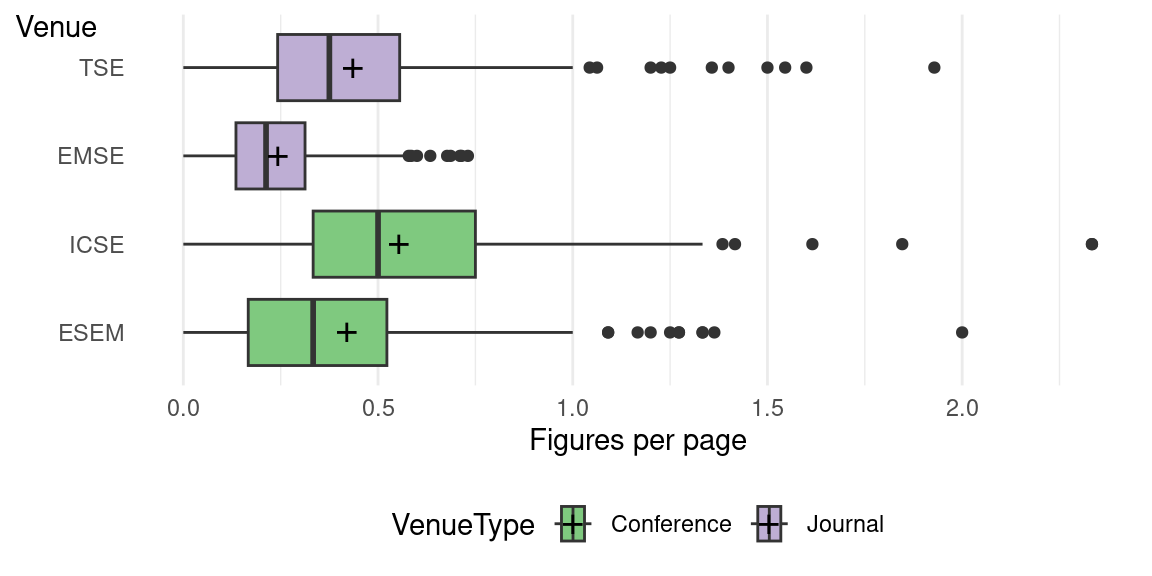

In [ ]:
dg.density <-
dg |> filter(!Missing) |> 
  group_by(VenueType,Venue,Year,DOI) %>% 
  summarize(num_fig=sum(Fig!=0),fig_per_page=num_fig/first(pages),pages=first(pages),.groups="drop")

dg.density |> 
ggplot(aes(x=fig_per_page,y=Venue, fill=VenueType)) +
  geom_boxplot() +
  geom_point(aes(x=mean_fig), 
             shape="+",size=5,
             data=function(d) d |> group_by(Venue, VenueType) |>
                   summarize(mean_fig=mean(fig_per_page,na.rm=TRUE),
                             .groups = "drop")) +
  scale_fill_brewer(type="qual",palette=1)+
  xlab("Figures per page") + 
  theme_minimal()+
  theme(panel.grid.major.y = element_blank(),
        legend.position = "bottom",
        axis.title.y = element_text(vjust=1,angle = 0, margin = margin(r=-15)))

We observe that on average the papers have a mean density of 0.42 figures per page and the median is 0.35. The details are reported in @tbl-figure-density. The proportion of articles that have no picture is 2.9%, with the highest percentage for ESEM conference (9.4%).

In [ ]:
dg.density|> arrange(Venue) |>
  rbind(dg.density|>mutate(Venue="Total")) |>
  group_by(Venue) |> 
  summarize( MeanFigures = round(mean(num_fig),1),
             #MedianFigures = round(median(num_fig),1),
             MeanPages = round(mean(pages),1),
             #MedianPages = round(median(pages),1),
             MeanDensity=round(mean(fig_per_page),2),
             MedianDensity=round(median(fig_per_page),2),
             WithoutFigure=sum(num_fig==0), 
             Pct=paste0(round(WithoutFigure/n()*100,1),"%")
             ) |>
  mutate(WithoutFigure=paste0(WithoutFigure," (",Pct,")")) |>
  select(-Pct) |>
  kableExtra::kbl(booktabs = T,
                  #col.names = c("Venue","Mean F","Med F","Mean P","Med P","Mean D","Med D","w/o Fig","%"))
                  #col.names = c("Venue","Mean F","Mean P","Mean D","w/o Fig","%"))
                  col.names = c("Venue","Figures","Pages","Mean F/P","Median F/P","w/o Fig"),
                  align="lrrrr")

By looking at the figure we can observe significant differences among the four venues. Such visual assessment is confirmed by the result of an ANOVA analysis of figure density vs. Venue that are reported in @tbl-anova-density. Considering as the reference level for the Venue variable the ESEM conference, by looking at the coefficient estimates we observe a significantly lower higher value for the ICSE conference and lower for EMSE journal, while the density of TSE is not different.

In [ ]:
lm(fig_per_page~Venue, data=dg.density) |> summary() |> 
  coefficients() |> as_tibble(rownames="Coefficient") |>
  pvalue_fmt("Pr(>|t|)") |>
  kableExtra::kbl(booktabs = T, digits=3)

Since the length of articles we report in @fig-pages-density a scatter plot of figure density vs. number of pages.

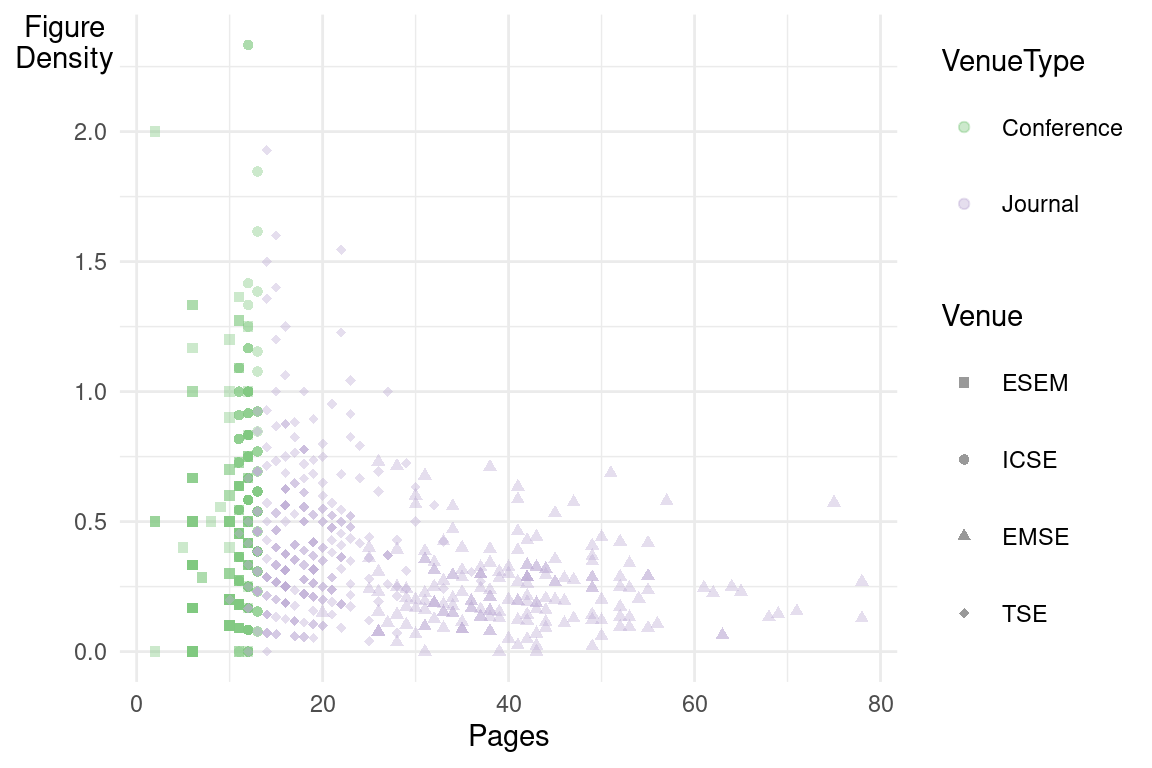

In [ ]:
dg.density |>
ggplot(aes(x=pages,y=fig_per_page, color=VenueType, shape=Venue)) +
  geom_point(alpha=0.4) +
  #geom_point(position=position_jitter(width=0.5,height = 0.5)) +
  scale_color_brewer(type="qual",palette=1)+
  scale_shape_manual(values=15:18)+
  #scale_x_log10()+
  xlab("Pages") + ylab("Figure\nDensity") +
  theme_minimal()+
  theme(legend.position = "right",
        legend.key.height = unit(2,"lines"),
        axis.title.y = element_text(vjust=1,angle = 0, margin = margin(r=-15)))

pf.cor <- cor.test(dg.density$pages,dg.density$fig_per_page)

We observe a small negative correlation (Pearson r=-0.273) between the number of pages and the figure density.

To understand if a change in time occurred we compared the two conferences over the same years. @fig-density-time reports the boxplot of density over three years.

Warning in cor.test.default(x = mf[[1L]], y = mf[[2L]], ...): Cannot compute
exact p-value with ties

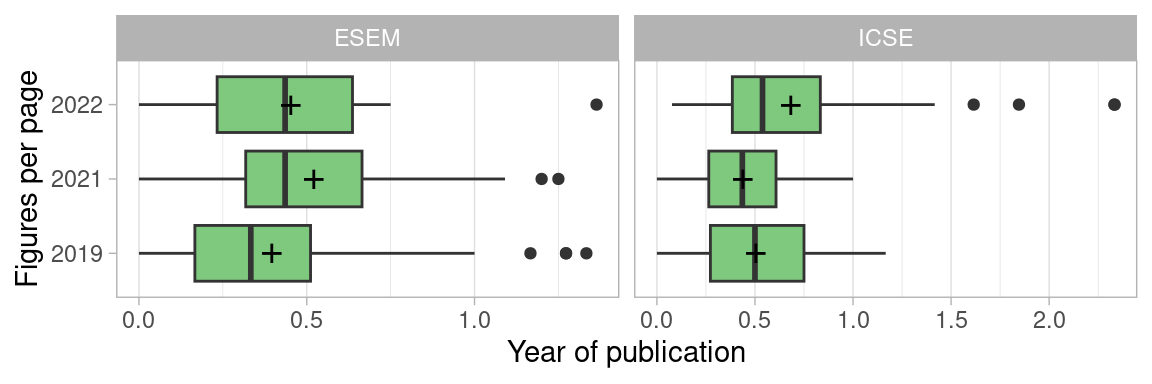

In [ ]:
dg.density |> filter(Year>=2019,VenueType=="Conference") |>
ggplot(aes(x=fig_per_page,y=as_factor(Year))) +
  geom_boxplot(fill="#7FC97F") +
  geom_point(aes(x=mean_fig), 
             shape="+",size=5,
             data=function(d) d |> group_by(Year,Venue) |>
                   summarize(mean_fig=mean(fig_per_page,na.rm=TRUE),
                             .groups = "drop")) +
  ylab("Figures per page") + xlab("Year of publication") +
  facet_wrap("Venue",ncol=2,strip.position = "top",scales = "free_x")+
  theme_light()+theme(panel.grid.major.y = element_blank())

yp.cor <- cor.test(~ fig_per_page + Year, 
         method="spearman",
         data=dg.density|> filter(VenueType=="Conference",Year>=2019))

From the figure we can observe a negligible (r=0.138) correlation of density with year of publication.

## RQ2 Content

@fig-category-venue reports the proportion of quantitative (Q) vs. non quantitative (NonQ) figures in the article, divided by venue.

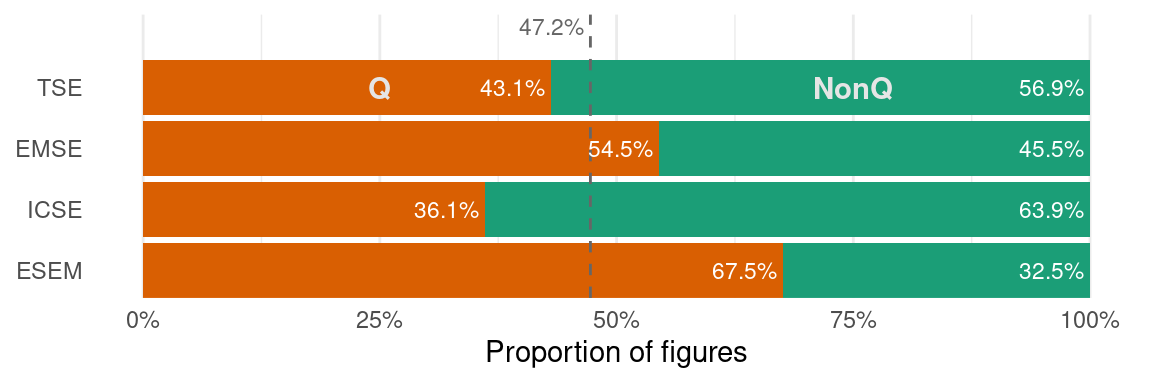

In [ ]:
dg %>% filter( !Missing, !is.na(Type) ) %>% 
  group_by(Venue) %>% 
  count(quantitative) %>% 
  mutate( prop = n / sum(n)) %>% 
ggplot(aes(x=prop,y=Venue,fill=quantitative)) +
  geom_col() +
  ylab(NULL) +
  scale_x_continuous(label=scales::label_percent())+
  scale_fill_brewer(type="qual",palette=2,labels=c("Q","NonQ"),breaks=c(TRUE,FALSE))+
  geom_vline(aes(xintercept=prop),color="gray40",linetype=2,
             data=~.x|>ungroup()|>group_by(quantitative)|>
                  summarize(n=sum(n),.groups="drop")|>
                  mutate(prop=n/sum(n))|>
                  filter(quantitative=="Q")) +
  geom_text(aes(label=paste0(round(prop*100,1),"% "),y=5),color="gray40",
             hjust="right",size=3,
             data=~.x|>ungroup()|>group_by(quantitative)|>
                  summarize(n=sum(n),.groups="drop")|>
                  mutate(prop=n/sum(n))|>
                  filter(quantitative=="Q")) +
  geom_text(aes(x=pos,label=(prop*100)|>round(1)|>paste0("% ")), 
            hjust="right",color="white",
            data=~.x|>group_by(Venue)|>arrange(-as.numeric(quantitative))|>mutate(pos=cumsum(prop)),size=3) +
  scale_y_discrete(expand=expansion(add=c(0,1.2)))+
  annotate("text",x=c(0.25,0.75),y=c(4,4),label=c("Q","NonQ"),color="gray90",fontface="bold") +
  xlab("Proportion of figures")+
  theme_minimal()+theme(panel.grid.major.y = element_blank(),
        legend.position = "bottom",
        axis.title.y = element_text(vjust=1,angle = 0, margin = margin(r=-15)))

Roughly half (47.2%) of the figures are used to convey quantitative information while the remaining are used to represent other types of information. The proportion varies notably among the four venues considered, with ESEM conference articles having an average of two thirds figures being quantitative, while ICSE articles invert the proportion with around one third of quantitative figures.

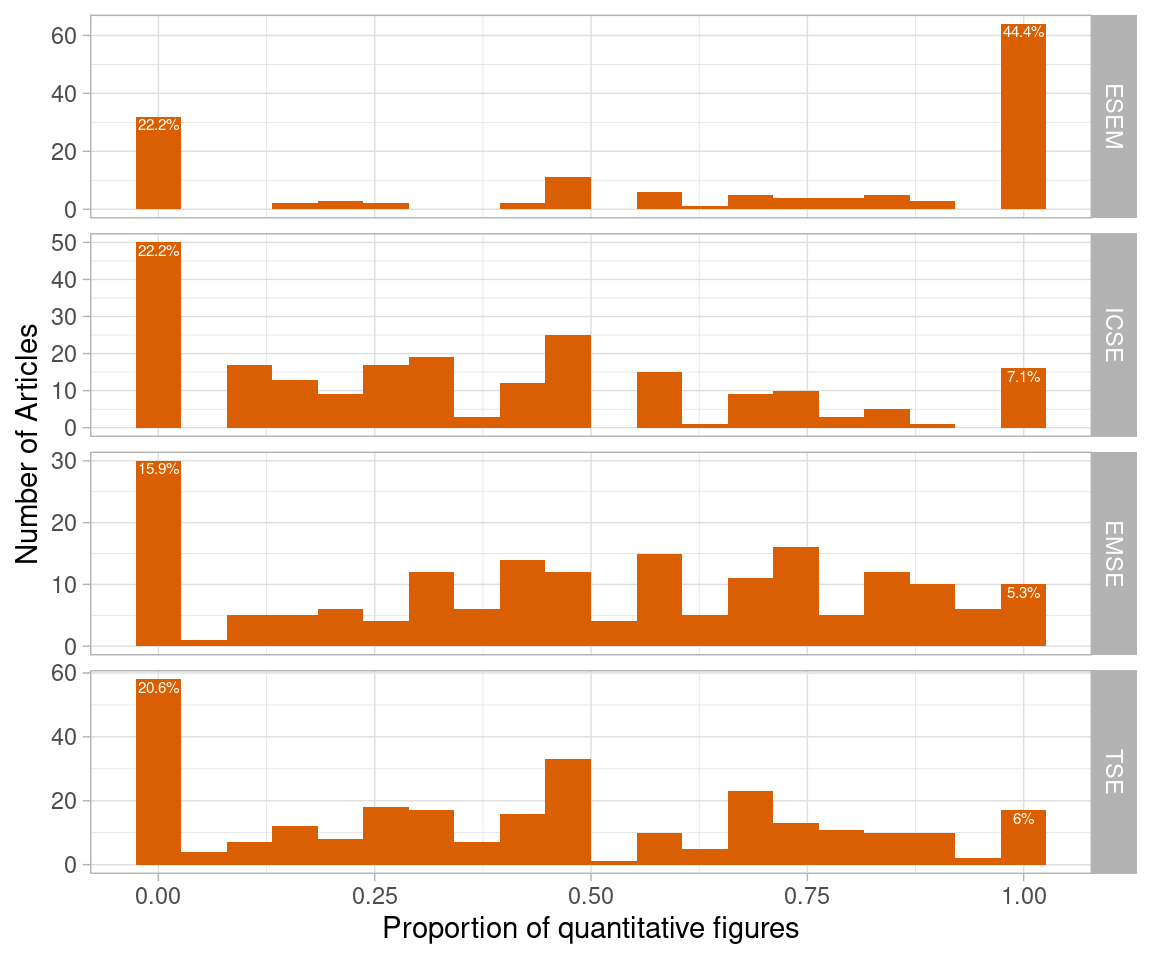

In [ ]:
dg.q <-
dg |> filter( !Missing, !is.na(Type) ) |> 
  group_by(Venue,DOI) |> 
  count(quantitative) |>
  complete(quantitative,fill=list(n=0)) |>
  pivot_wider(values_from = "n", names_from = "quantitative") |>
  group_by(Venue) |>
  summarize(PropQ = sum(Q)/sum(NonQ+Q), 
            MeanPropQ = mean(Q/(NonQ+Q)), 
            SDPropQ = sd(Q/(NonQ+Q)), 
            NumNoQ = sum(Q==0),
            PropNoQ = sum(Q==0)/n(), 
            NumOnlyQ = sum(NonQ==0),
            PropOnlyQ = sum(NonQ==0)/n(),.groups = "drop")

dg |> filter( !Missing, !is.na(Type) ) |> 
  group_by(VenueType,Venue,DOI) |> 
  count(quantitative) |>
  complete(quantitative,fill=list(n=0)) |>
  pivot_wider(values_from = "n", names_from = "quantitative") |>
  summarize(PropQ = Q/(NonQ+Q), .groups="drop") |>
ggplot(aes(x=PropQ))+
  geom_histogram(fill="#D95F02",bins=20)+
  geom_text(aes(label=paste0(round(PropNoQ*100,1),"%"),x=0,y=NumNoQ),vjust=1.2,size=2,data=dg.q,color="white")+
  geom_text(aes(label=paste0(round(PropOnlyQ*100,1),"%"),x=1,y=NumOnlyQ),vjust=1.2,size=2,data=dg.q,color="white")+
  facet_wrap("Venue",ncol=1,scales="free_y",strip.position="right")+
  xlab("Proportion of quantitative figures")+
  ylab("Number of Articles")+
  theme_light()

The detailed distribution of the proportion of quantitative figures per paper is reported in @fig-q-prop. We observe that in the case of ESEM the distribution is very extreme with 22% of articles that have no quantitative figure at all and 44% that contain only quantitative figures. For the other venues the proportion articles with only quantitative figures is much smaller with proportions ranging from 5% to 7%, while the proportion of articles with only non quantitative figures is close to 20%.

Focusing on the non quantitative figures only, @fig-nonq reports the numbers as well as the proportion of the five different non quantitative types defined in our taxonomy. Two out of three non quantitative figures fall into the broad *Schema* category that includes all the diagrams use to explain something, including also software architecture or UML diagrams. Around one in five *NonQ* figures are used to depict code, this is common practice used instead of the *Listing* environment. A smaller proportion (8.2%) is represented by screenshots. Eventually, we observed a few figures depicting graphs – set of nodes and edges possibly labelled – and just 59 figures reporting pictures or photographs.

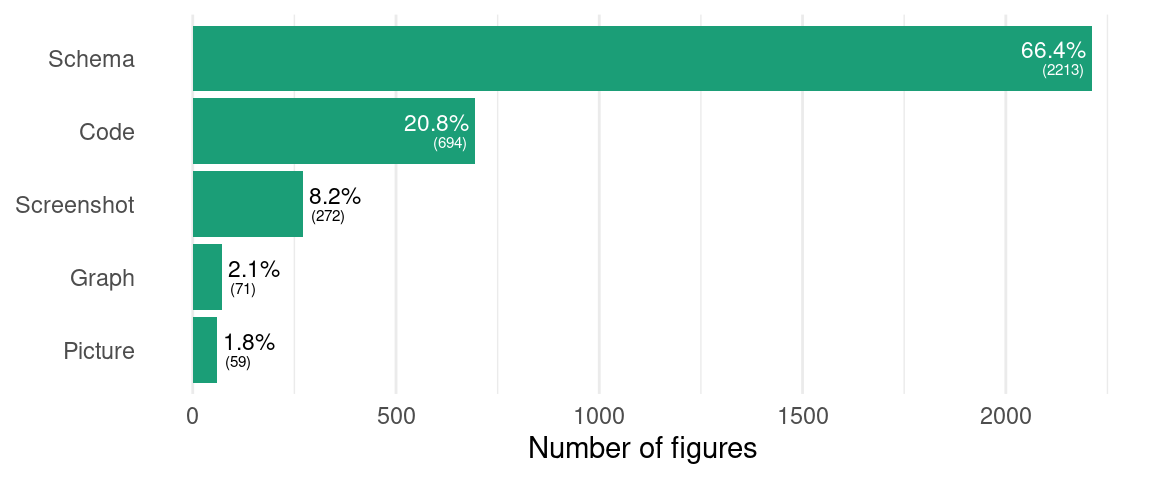

In [ ]:
dg %>% filter( !Missing, !is.na(Type), quantitative=="NonQ" ) %>% 
  count( main_type ) %>% 
  mutate( prop = n / sum(n)) %>% 
  mutate(main_type = reorder(main_type,n)) %>% 
  filter(prop>=0.01) %>% 
ggplot(aes(x=n,y=main_type)) +
  geom_col(fill="#1B9E77") +
  geom_text(aes(label=paste0(" ",round(prop*100,1),"% "),
                color=if_else(prop<0.1,"black","white"),
                hjust=if_else(prop<0.1,"left","right")), vjust="bottom", size=3) +
  geom_text(aes(label=paste0("  (",n,")  "),
                color=if_else(prop<0.1,"black","white"),
                hjust=if_else(prop<0.1,"left","right")), vjust=1.5, size=2) +
  scale_color_identity(guide="none") +
  ylab(NULL) + xlab("Number of figures")+
  theme_minimal()+theme(panel.grid.major.y = element_blank())

## RQ3 Types

We report in @fig-quantitative the overall proportion of the different types of quantitative figures present in our taxonomy.

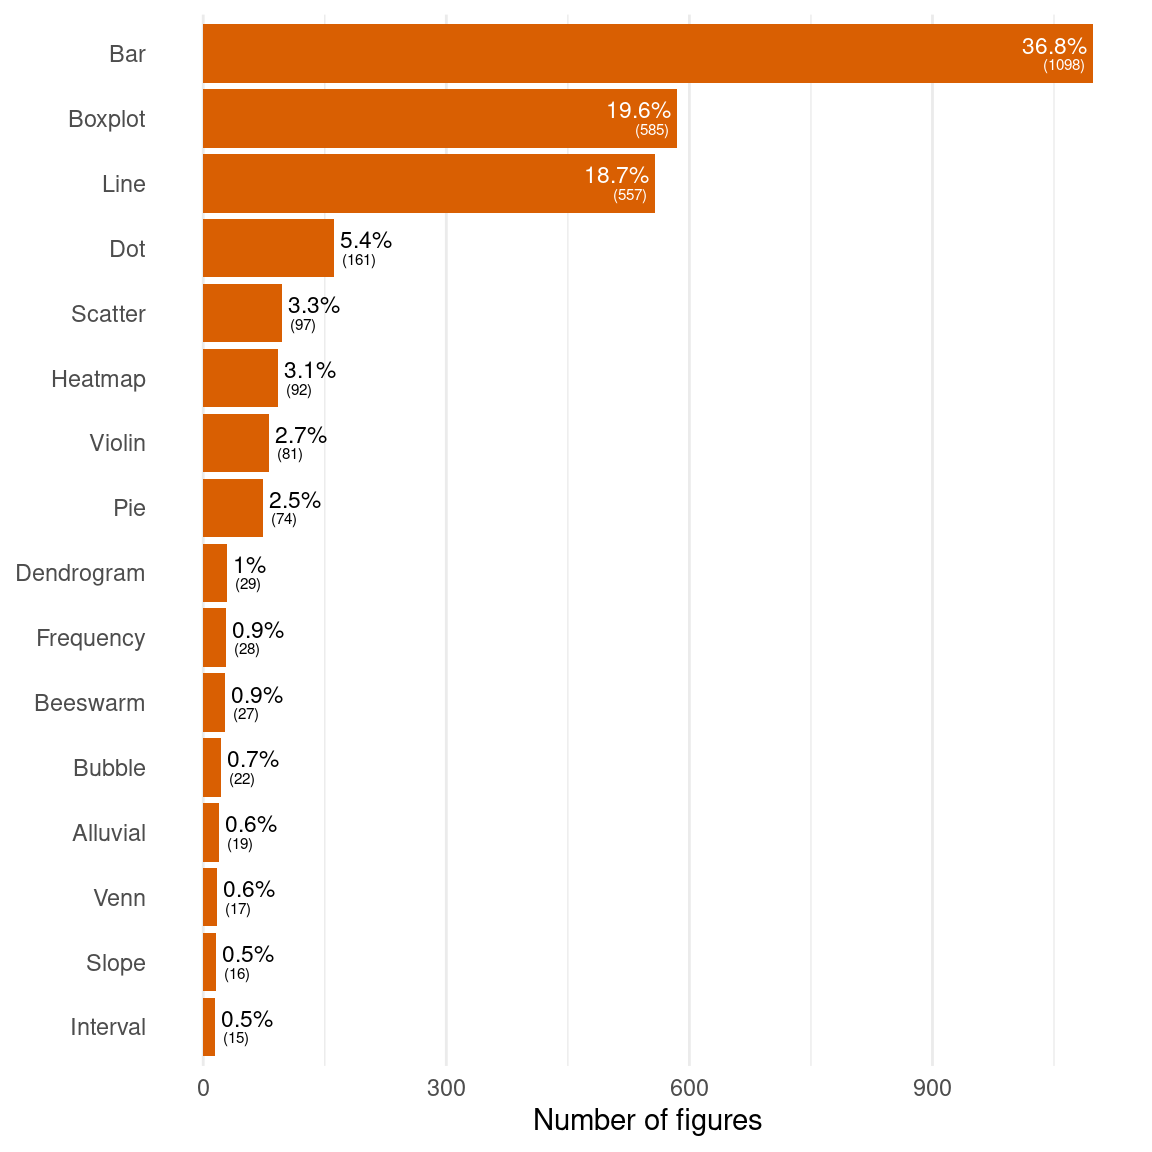

In [ ]:
dg %>% filter( !is.na(Type), quantitative=="Q" ) %>% 
  count( main_type ) %>% 
  mutate( prop = n / sum(n)) %>% 
  mutate(main_type = reorder(main_type,n)) %>% 
  filter(prop>=0.005) %>% 
ggplot(aes(x=n,y=main_type)) +
  geom_col(fill="#D95F02") +
  geom_text(aes(label=paste0(" ",round(prop*100,1),"% "),
                color=if_else(prop<0.1,"black","white"),
                hjust=if_else(prop<0.1,"left","right")), vjust="bottom", size=3) +
  geom_text(aes(label=paste0("  (",n,")  "),
                color=if_else(prop<0.1,"black","white"),
                hjust=if_else(prop<0.1,"left","right")), vjust=1.5, size=2) +
  scale_color_identity(guide="none") +
  ylab(NULL) + xlab("Number of figures") +
  theme_minimal()+theme(panel.grid.major.y = element_blank())

Overall one of every three quantitative figures contains a bar plot The two other common used plot types are boxplots (19.6%) and line plots (18.7%). Dot plots and scatter plots together make 8.8%, heatmaps account for 3.1% of quantitative figures, the remaining types overall account for 13% of quantitative diagram, any of them accounting for less than 3% individually.

In the taxonomy we used for quantitative diagram types – reported in @sec-variables –, we have different types of bar plots. @fig-bars reports the number and the proportion of the different type of bar charts. Apart the simple bar charts that are used in half of the cases, one in four bar diagram use grouped or clustered bars, and 17% use stacked bars. A small minority of bar diagram are diverging diagrams.

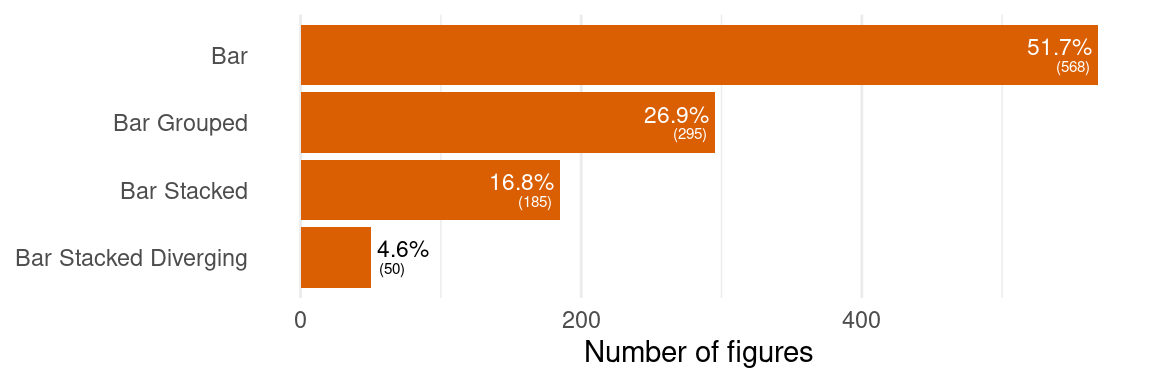

In [ ]:
dg|>filter(main_type=="Bar")|>
  mutate(BarType = if_else(str_detect(Type,"[Gg]roup"),"Bar Grouped","Bar"),
         BarType = if_else(str_detect(Type,"[Ss]tack"),"Bar Stacked",BarType),
         BarType = if_else(str_detect(Type,"[Dd]iverg"),"Bar Stacked Diverging",BarType))|>
  count( BarType ) %>% 
  mutate( prop = n / sum(n)) %>% 
  mutate(BarType = reorder(BarType,n)) %>% 
  filter(prop>=0.005) %>% 
ggplot(aes(x=n,y=BarType)) +
  geom_col(fill="#D95F02") +
  geom_text(aes(label=paste0(" ",round(prop*100,1),"% "),
                color=if_else(prop<0.1,"black","white"),
                hjust=if_else(prop<0.1,"left","right")), vjust="bottom", size=3) +
  geom_text(aes(label=paste0("  (",n,")  "),
                color=if_else(prop<0.1,"black","white"),
                hjust=if_else(prop<0.1,"left","right")), vjust=1.5, size=2) +
  scale_color_identity(guide="none") +
  ylab(NULL) + xlab("Number of figures") +
  theme_minimal()+theme(panel.grid.major.y = element_blank())

## RQ4: Errors

On the basis of the error taxonomy described in section @sec-error-taxonomy we detected the errors committed in the quantitative figures. The violin plots in @fig-error-venue-distr describe the distribution of errors per quantitative figure detected in the articles appearing in the four considered venues.

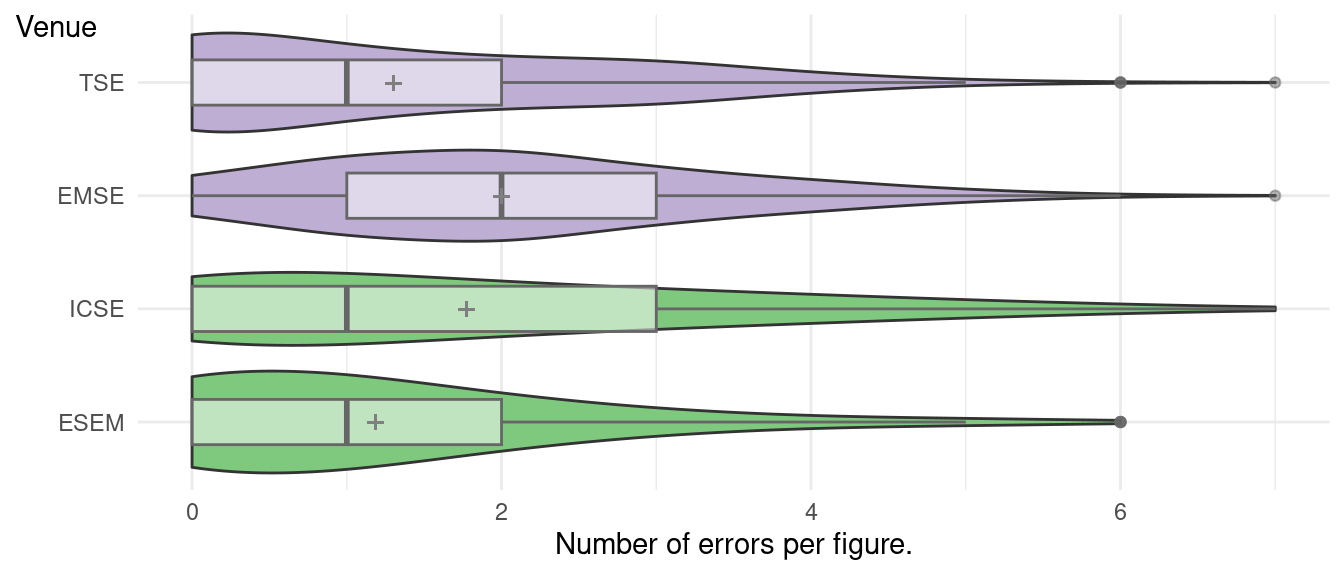

In [ ]:
dg %>% filter(!Missing,quantitative=="Q") %>% 
      mutate(n_errors = rowSums(across(all_of(errors$Error)))) %>% 
      select(-errors$Error) %>% 
ggplot(aes(y=Venue,x=n_errors,fill=VenueType))+
  geom_violin(adjust=2)+
  geom_boxplot(color="gray40",fill="white",alpha=0.5,width=0.4)+
  geom_point(shape="+", size=4, color="gray50",
             data=~.x|>group_by(Venue)|>mutate(n_errors=mean(n_errors)))+
  scale_fill_brewer(type="qual",palette=1,guide = "none")+
  theme_minimal()+
  xlab("Number of errors per figure.")+
  theme(legend.position = "bottom",
        axis.title.y = element_text(vjust=1,angle = 0, margin = margin(r=-15)))

NoErrorSummary <-
dg %>% filter(!Missing,quantitative=="Q") |>
      mutate(n_errors = rowSums(across(all_of(errors$Error)))) |>
      select(-errors$Error) |> 
      group_by(Venue) |>
      summarize(CountNoError = sum(n_errors==0),PropNoError=CountNoError/n()) |>
      mutate(PropNoError = (PropNoError*100) |> round(1) |> paste0("%")) |>
      mutate(Descr = paste(PropNoError,"for",Venue)) |>
      summarize(Summary = paste(Descr, collapse=",")) |>
      as.character()

We observe the average number of errors per figure is 1.6 (median 1). Overall half of the figures exhibit at least one error, with half the EMSE articles showing at least 2 errors. Concerning the proportion of figures where no error was detected, they are 37.4% for ESEM,30.6% for ICSE,12.2% for EMSE,40.1% for TSE.

A more detailed picture can be gained by looking at the frequency of error free figures by severity level and venue reported in @tbl-severity-error-free.

In [ ]:
dg %>% filter(!Missing,quantitative=="Q") |>
pivot_longer(cols=all_of(errors$Error),names_to = "Error",values_to = "Detected", ) |>
left_join(errors |> select(Error,Severity), by="Error") |>
group_by(VenueType,Venue,DOI,Fig,Severity) |>
summarize( n_errors = sum(Detected), .groups="drop") |>
group_by(VenueType,Venue,Severity,n_errors) |>
summarize( count=n(), .groups = "drop") |>
group_by(VenueType,Venue,Severity) |> 
mutate(prop = count/sum(count)) |>
filter(n_errors==0) |>
ungroup() |>
select(Venue,Severity,prop) |>
mutate(prop = (prop*100) |> formatC(format="f",digits=1) |> paste0("%") ) |>
pivot_wider(names_from="Severity",values_from="prop") |>
kableExtra::kbl(booktabs = T, position="tb")

Overall we observe that one every four pictures contains at least a critical error, with similar condition across the four venues. Concerning the major errors, the journal TSE and the conference ESEM contain at least one error in one out of three figures, while the proportion of figures with at least one major error is 50% for ICSE and 60% for EMSE. As far as minor errors are concerned, we observe a similar amount of defective figures for all venues except EMSE where 60% of figures contain at least one error.

Focusing down more, from the severity levels to the specific types of errors, @fig-error-type reports the occurrence numbers and proportions of all the error types defined in the error taxonomy we defined in @sec-error-taxonomy. The errors types are reported divided by severity levels.

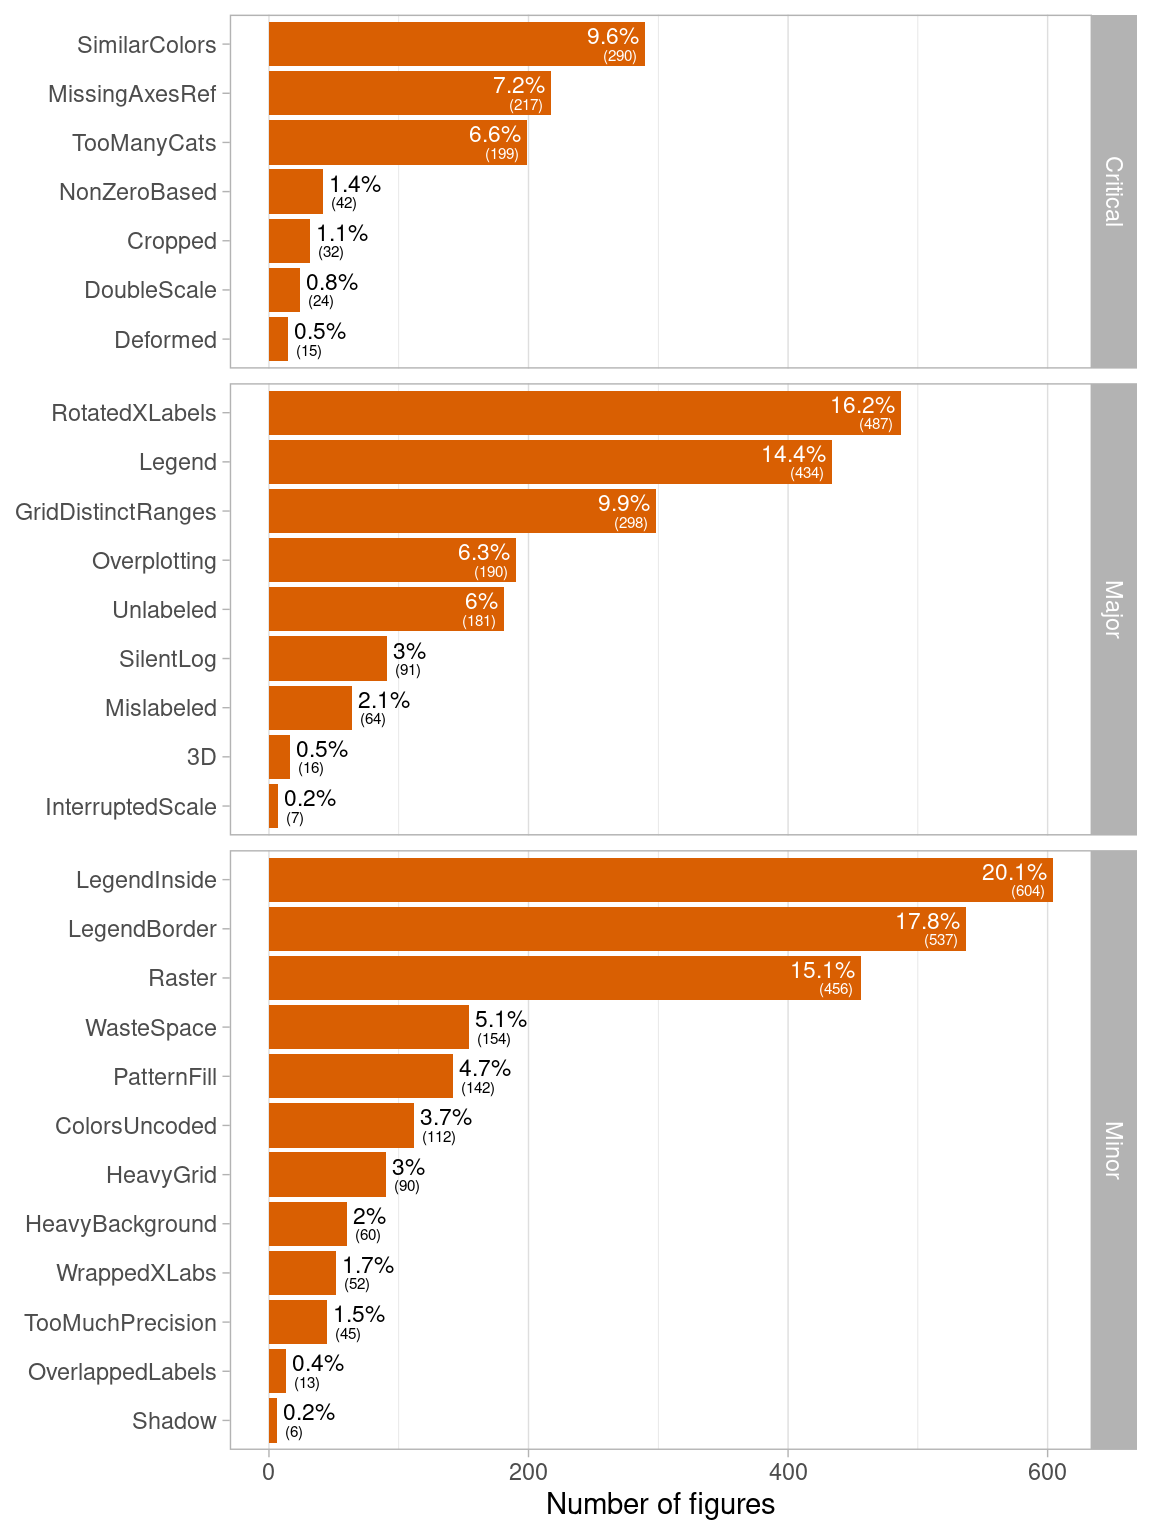

In [ ]:
num_qfigures <- nrow( dg %>% filter(!Missing,quantitative=="Q") )
dg %>% filter(!Missing,quantitative=="Q") %>% 
  pivot_longer(cols=all_of(errors$Error),names_to = "Error") %>% 
  group_by(Error) %>% 
  summarize( n = sum(value), .groups = "drop") |>
  full_join(errors |> select(Error,Severity),by="Error") |>
  mutate(prop= n / num_qfigures, Error = reorder(Error,n)) |>
ggplot(aes(y=Error,x=n)) +
  geom_col(fill="#D95F02") +
  geom_text(aes(label=paste0(" ",round(prop*100,1),"% "),
                color=if_else(prop<0.06,"black","white"),
                hjust=if_else(prop<0.06,"left","right")), vjust="bottom", size=3) +
  geom_text(aes(label=paste0("  (",n,")  "),
                color=if_else(prop<0.06,"black","white"),
                hjust=if_else(prop<0.06,"left","right")), vjust=1.5, size=2) +
  scale_color_identity(guide="none") +
  facet_grid(Severity~.,scales="free_y", space = "free_y")+
  ylab(NULL) + xlab("Number of figures") +
  theme_light()+theme(panel.grid.major.y = element_blank())

As far as the major errors are concerned, we observe that the most common error – affecting 9.6% of figures – is the adoption of a colour palette that does not enable an easy distinction of categories. The next error consists in missing references on the axes (7.2%), and eventually the attempt to encode too many distinct categories in a single plot (6.6%).

The most common major error is the use of rotated labels on the x axis (16.2%), next is the use of a legend instead of direct labelling (14.4%). The next error affects figures containing multiple diagrams and consists in using different scales on aligned diagrams (9.9%).

The two most common minor errors regard the use of legends, often (20% of figures) the legend is placed inside the plot, which reduces the clarity, also (17.8%) the legend is surrounded by a border that affects the ease of scanning back and forth between plot and legend itself. Another common error is the use of raster images (15.1%) that affects the overall visual quality of the diagram.

# Discussion

Based on the findings reported in the previous section we can answer the original research questions of the research and outline a few additional considerations.

## Answers to Research Questions

As far as the mode of use of figures (RQ1) is concerned, we observed a relatively large adoption of figures with an average of 0.42 figures per page. As a comparison the present paper contains 12 figures in 8 pages, that is 1.5 figures per page, a clear outlier if we look at @fig-density. Two venues are aligned with the average (ESEM and TSE) while the two other depart significantly: ICSE has higher density while EMSE has lower density. Concerning this latter difference, it can be explained by the larger number of pages of the articles published by EMSE.

> **RQ1: how are figures used in SE articles?**
>
> On average, there are two figures every five pages with some difference among venues, partly due to the length of articles.

Concerning the category of figures – quantitative vs. non-quantitative –, we found that 47% of figures is quantitative but there are large difference among the three considered venues. Articles appearing in ICSE have just 1/3 of Q figures while ESEM papers have 2/3. A possible explanation for such difference is that since ESEM is hosting mainly empirical studies, the authors often need to show quantitative information and Q figures are widely – 44% of papers contain only quantitative figures – used for this purpose. On the other hand, ICSE hosts papers that have less empirical content and thus employ Q figures less, moreover the wide spectrum of topics present at ICSE require to provide context and details that are better explained with diagrams; such use of overview diagrams could explain the higher number of figures in ICSE papers, in fact the proportion of articles without quantitative figures is simila in ICSE and ESEM.

> **RQ2: what are figures used for?**
>
> A bit less than half of the figures are used to convey quantitative information, with wide variation from 1/3 to 2/3. Overall one in five papers have no quantitative figure at all; while only 6% of papers contain only quantitative figures, with the notable exception of ESEM conference where 44% articles do.

When looking at the type of quantitative diagrams used, we observe that more than one in three is a bar plot (36.8%). The second most used diagram type are boxplots (19.6%), in fact showing the distribution of a set of values is a common necessity in empirical studies. Other means to show distributions are violin plots (2.7%) and beeswarm (0.9%), in addition to histograms that in our taxonomy are conflated with bar plots. Line plots represent the third most common type of quantitative diagram (18.7%). They address the common requirement of showing trends and relationships between pairs of variables. Scatter plots that have similar use are much less common (3.3%). Other types of diagram that are known for perceptual issues, that is pies and bubbles, are rarely used: 2.5% and 0.7% respectively.

> **RQ3: what type of quantitive diagrams are used?**
>
> The most common type is bar plot, used in one out of three figures, followed by boxplots and line plots, each used in 20% of figures.

Talking about errors, we found 1.6 errors per figure on average (median 1). Anyway, across all venues, one in three figures showed no errors according to our taxonomy, while considering only critical errors, three out of four figures are fine. Focusing on major and minor errors, we observed that half of the figures showed at least one.

The use of colours too similar to each other is the most common critical error, this is often due to little care spent in selecting an appropriate palette. The lack of values on the axes is another relatively common error that has a heavy impact on the ability to understand the diagram. Often in graphs that have been generated by basic tools – e.g. spreadsheet programs –, the categories are automatically encoded using many different variation of a single visual attribute – e.g. shape or color – that require a lot of cognitive effort to be discerned. A little more design effort should be spent in finding alternative representations that make understanding more immediate. Another common result of using unaltered graphs produced by e.g. spreadsheets is having rotated or slanted labels on the x axis, making reading the graph more difficult than required. Most of the time a simple solution is to swap x and y axes; this should be the immediate choice in presence of long labels. Another common mistake that is worth mentioning is the use of a legend instead of direct labelling the series of data in the plot area. This is probably due to the default in most tools as well as the difficulty in implementing direct labelling in those tools.

Most of the times errors could be solved with a small effort. We believe they are introduce because authors do not pay enough attention to the quality of the figures and, in the case of journals, neither the reviewers do. Some basic and easy to follow guidelines are presented in the Empirical Standards for Software Engineering Research \[@EmpiricalStandards\].

We note that very few figures show evident mistakes such as using non-zero based bars, copping figures, adopting double scales or deforming the graph area; still almost 5% of figures are affected.

> **RQ4: what errors are found in quantitative figures?**
>
> The average figure in SE articles contains one or two errors, although on average 1/3 of figures show no error. A common critical error is the use of hard to discern palettes. The use of rotated labels on the x axis is the most widespread major error. Common minor errors include a less than ideal use of legends.

## Limitations

The study presented in this paper is exploratory and therefore presents several limitations; we highlight the main ones.

Only a few selected SE publication venues have been considered. Although the venues have a very good reputation, they do not represent the whole publication spectrum in SE. Moreover the articles have been drawn from a limited time span, they represent a sample. This might affect the external validity of the study. The graph error taxonomy has been built based on the literature in the area of data visualization, although it has not been empirically validates. It could have omitted important errors or, vice-versa, considered error that are not such in the view of other researchers. In addition the severity level has been assigned to each error on the basis of the author expert judgment. In the classification of the type of quantitative diagrams we considered only the main type, although there are several cases of diagram that mix multiple types, e.g. bars + lines, that were not considered.

# Conclusions

In this work we collected articles from four leading SE publication venues, two conferences and two journals, and analyzed how figures are used. We found the average density is 0.42 figures per page and half of them are used to convey quantitative information. The most common quantitative graph types are bar plots, boxplots, and line plots. We also classified the errors committed in the quantitative graphs and we found that on average every figure has 1 or 2 errors.

Most errors are relatively easy to address and we advocate for a wider diffusion of visual literacy in the SE research community.

As future work we would like to extend the survey to a wider time span as well as other venues. In addition we should take into consideration figures with multiple types. Eventually, a pragmatic guide to assess and improve quantitative diagrams and help researchers avoid the most common pitfalls, could be defined based on this work.

# References